#  Cours 2 : Gradient Decresent - Régression linéaire et polynomiale
### Author:  Ricardo Vallejo

# Excercise 1:  Regression lineaire

### 1.1. Générez un vecteur x de données aléatoires de dim 100.
### 1.2. Soit y la variable à prédire tels que y = 4 + 3x + (étant un bruit gaussien).
### 1.3. Représentez le diagramme de dispersion de y en fonction de x.


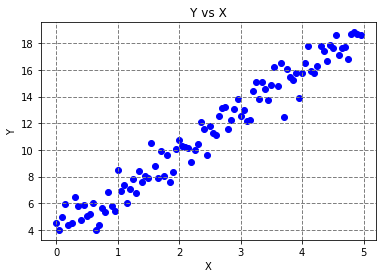

In [32]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook

# generate random floating point values
from numpy.random import seed
from numpy.random import rand


def f(x):  # función f(x) = 3*x + 4 + Ruido_Gaussiano
    np.random.seed(42)
    y = 4 + 3*x + np.random.randn(x.shape[0])
    return y

x = np.arange(0, 5, 0.05) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x)

# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Y")
plt.xlabel("X")
plt.title('Y vs X');

In [33]:
x= x.reshape(100,1)


### 1.4. Modèle de régression linéaire -  l’équation normale. 


- When to use Normal Equation?
    - If the algorithm you want to use is Linear Regression and exactly Linear Regression and,
    - If n (number of features) is small.
    - If m (number of training examples) is small i.e. around 20,000.

In [34]:
def find_theta(X, Y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    Y = Y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    
    return theta

In [35]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(x, y)
theta

array([[3.02786519],
       [3.82718715]])

In [36]:
theta[0]

array([3.02786519])

### Rta:  y = 3.02786519x + 3.8271871459226237

In [45]:
def predict(X):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    
    return preds

In [46]:
# Getting the predictions on X using the predict function.
Ypreds = predict(x)


Text(0, 0.5, 'y - targete')

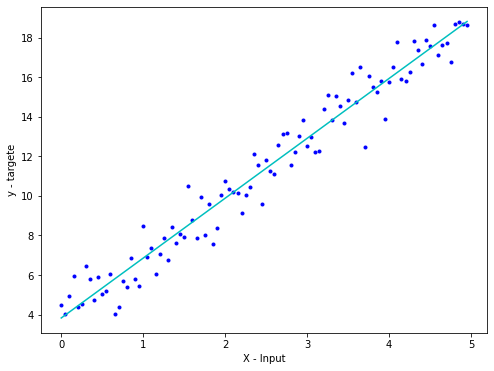

In [47]:
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'b.')
plt.plot(x, Ypreds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - targete')

### 1.5. Modèle de régression - LinearRegression
         Écrivez l’équation de régression obtenue

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X2 = x.reshape((-1,1))
Y2 = y

mymodel2 = LinearRegression()
results2 = mymodel2.fit(X2,Y2)

print("Coeficient determination: \n", results2.score(X2, Y2))
print("Intercept: \n", results2.intercept_)
print("Slope: \n", results2.coef_)


Coeficient determination: 
 0.9590765985572945
Intercept: 
 3.8271871459226237
Slope: 
 [3.02786519]


### Rta:  y = 3.02786519x + 3.8271871459226237

### 1.6 :Linear Regression - Gradient Descendent

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [50]:
X = x.reshape((-1,1))
Y = y

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

[1.0039687  0.89568893 1.10465648 1.33358155 0.97475028 1.00824402
 1.4465956  1.29884227 1.05617113 1.31561528 1.12450355 1.15747742
 1.3489719  0.90126705 0.97681227 1.26987954 1.20277802 1.53256117
 1.29315815 1.21405914 1.89010156 1.54595192 1.64492727 1.345241
 1.5752878  1.75508605 1.50683165 1.88118186 1.69668799 1.79915534
 1.76342972 2.34481407 1.96173773 1.76208915 2.21537865 1.79264712
 2.14534391 1.69467157 1.86915132 2.24313441 2.39754719 2.30442282
 2.27383152 2.26591549 2.0365267  2.23940463 2.33076678 2.70312308
 2.57731114 2.14045352 2.63992992 2.51508645 2.4834183  2.80461008
 2.93172128 2.94294728 2.58114334 2.73296617 2.90945348 3.08679052
 2.7954895  2.8945119  2.72244524 2.73586993 3.21784405 3.37272766
 3.08733635 3.36095989 3.25113546 3.05985001 3.31806194 3.61425733
 3.29635553 3.68717797 2.78643136 3.5883284  3.45774938 3.40504617
 3.52578195 3.09502594 3.52322941 3.68549653 3.96922033 3.55703243
 3.52572515 3.62769944 3.97759465 3.88010481 3.72191748 3.988281

In [51]:
m

array([1.0039687 , 0.89568893, 1.10465648, 1.33358155, 0.97475028,
       1.00824402, 1.4465956 , 1.29884227, 1.05617113, 1.31561528,
       1.12450355, 1.15747742, 1.3489719 , 0.90126705, 0.97681227,
       1.26987954, 1.20277802, 1.53256117, 1.29315815, 1.21405914,
       1.89010156, 1.54595192, 1.64492727, 1.345241  , 1.5752878 ,
       1.75508605, 1.50683165, 1.88118186, 1.69668799, 1.79915534,
       1.76342972, 2.34481407, 1.96173773, 1.76208915, 2.21537865,
       1.79264712, 2.14534391, 1.69467157, 1.86915132, 2.24313441,
       2.39754719, 2.30442282, 2.27383152, 2.26591549, 2.0365267 ,
       2.23940463, 2.33076678, 2.70312308, 2.57731114, 2.14045352,
       2.63992992, 2.51508645, 2.4834183 , 2.80461008, 2.93172128,
       2.94294728, 2.58114334, 2.73296617, 2.90945348, 3.08679052,
       2.7954895 , 2.8945119 , 2.72244524, 2.73586993, 3.21784405,
       3.37272766, 3.08733635, 3.36095989, 3.25113546, 3.05985001,
       3.31806194, 3.61425733, 3.29635553, 3.68717797, 2.78643

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

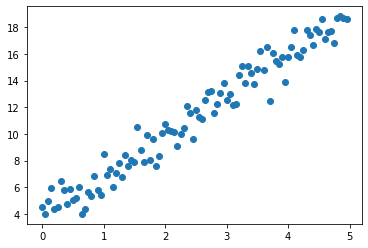

In [52]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
# Making predictions
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:

def Yy(m, b, x):
    return m*x + b;

Xr = np.arange(0, 5, 0.05) # generamos valores x de 0 a 20 en intervalos de 0.5
Yr1 = Yy(results.coef_, results.intercept_,  Xr)
Yr2 = Yy(theta[0], theta[1],  Xr)


plt.figure()
plt.figure(figsize=(18, 15))
plt.subplot(211)

plt.plot(X, Y, 'b-', label='Model Normal')
plt.plot(Xr, Yr2, 'g-', label='Model RL')
plt.plot(Xr, y, 'r.', label='Real samples')

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Ymodel")
plt.xlabel("Xmodel")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()